In [ ]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
batch_size = 128
num_classes = 10
epochs = 12
# input image dimensions
img_rows, img_cols = 28, 28
# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
  x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
  x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
  input_shape = (1, img_rows, img_cols)
else:
  x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
  x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
  input_shape = (img_rows, img_cols, 1)

# Normalize pixel values to [0,1] for stable training
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')
# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
model = Sequential()
model.add(Conv2D(6, kernel_size=(3,
3),activation='relu',input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(16, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(120, activation='relu'))
model.add(Dense(84, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

# https://keras.io/optimizers/
model.compile(loss=keras.losses.categorical_crossentropy,
optimizer=keras.optimizers.Adadelta(learning_rate=0.1, rho=0.95), metrics=['accuracy'])
model.fit(x_train, y_train,
batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(x_test,
y_test))

# Evaluate the test data
score = model.evaluate(x_test, y_test, verbose=0)
test_err = 1.0 - score[1]
print('Test loss:', score[0])
print('Test accuracy:', score[1])
print('Test error:', test_err)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/12
469/469 ━━━━━━━━━━━━━━━━━━━━ 14s 10ms/step - accuracy: 0.5175 - loss: 1.5286 - val_accuracy: 0.9252 - val_loss: 0.2612
Epoch 2/12
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9289 - loss: 0.2359 - val_accuracy: 0.9485 - val_loss: 0.1679
Epoch 3/12
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9488 - loss: 0.1697 - val_accuracy: 0.9598 - val_loss: 0.1302
Epoch 4/12
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9561 - loss: 0.1463 - val_accuracy: 0.9652 - val_loss: 0.1155
Epoch 5/12
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9619 - loss: 0.1230 - val_accuracy: 0.9687 - val_loss: 0.1030
Epoch 6/12
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9675 - loss: 0.1078 - val_accuracy: 0.9703 - val_loss: 0.0942
Epoch 7/12
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9701 - loss: 0.1005 - val_accuracy: 0.9750 - val_loss: 0.0845
Epoch 8/12
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9722 - loss: 0.0913 - val_accuracy: 

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
Epoch 1/12
469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.5811 - loss: 1.3558 - val_accuracy: 0.9302 - val_loss: 0.2342
Epoch 2/12
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9373 - loss: 0.2129 - val_accuracy: 0.9529 - val_loss: 0.1545
Epoch 3/12
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9545 - loss: 0.1538 - val_accuracy: 0.9640 - val_loss: 0.1189
Epoch 4/12
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9623 - loss: 0.1226 - val_accuracy: 0.9676 - val_loss: 0.1056
Epoch 5/12
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9674 - loss: 0.1084 - val_accuracy: 0.9738 - val_loss: 0.0916
Epoch 6/12
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9711 - loss: 0.0976 - val_accuracy: 0.9740 - val_loss: 0.0853
Epoch 7/12
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9737 - loss: 0.0849 - val_accuracy: 0.9762 - val_loss: 0.0761
Epoch 8/12
469/469 ━━━━━━━━━━━━

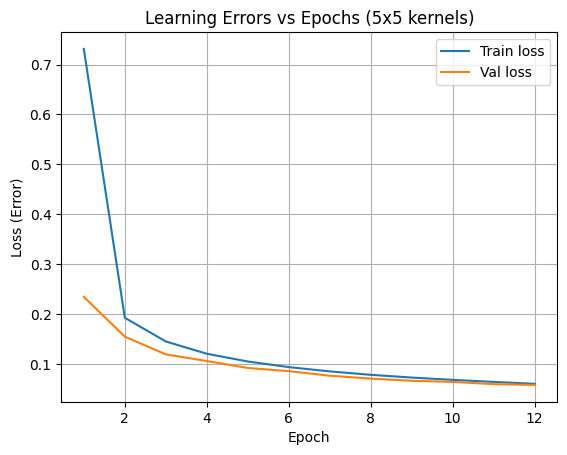

In [ ]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
import matplotlib.pyplot as plt

batch_size = 128
num_classes = 10
epochs = 12
# input image dimensions
img_rows, img_cols = 28, 28
# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
  x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
  x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
  input_shape = (1, img_rows, img_cols)
else:
  x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
  x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
  input_shape = (img_rows, img_cols, 1)

# Normalize pixel values to [0,1] for stable training
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')
# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
model = Sequential()
# kernel size updated
model.add(Conv2D(6, kernel_size=(5,
5),activation='relu',input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(16, (5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(120, activation='relu'))
model.add(Dense(84, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))
# https://keras.io/optimizers/
model.compile(loss=keras.losses.categorical_crossentropy,
optimizer=keras.optimizers.Adadelta(learning_rate=0.1, rho=0.95), metrics=['accuracy'])

# store history
history=model.fit(x_train, y_train,
batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(x_test,
y_test))


# Evaluate the test data
score = model.evaluate(x_test, y_test, verbose=0)
test_err = 1.0 - score[1]
print('Test loss:', score[0])
print('Test accuracy:', score[1])
print('Test error:', test_err)

# Plot
epochs_range = range(1, epochs + 1)
plt.figure()
plt.plot(epochs_range, history.history['loss'], label='Train loss')
plt.plot(epochs_range, history.history['val_loss'], label='Val loss')
plt.xlabel('Epoch')
plt.ylabel('Loss (Error)')
plt.title('Learning Errors vs Epochs (5x5 kernels)')
plt.legend()
plt.grid(True)
plt.show()

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
Epoch 1/12
469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 11ms/step - accuracy: 0.6097 - loss: 1.3096 - val_accuracy: 0.9308 - val_loss: 0.2336
Epoch 2/12
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9326 - loss: 0.2294 - val_accuracy: 0.9499 - val_loss: 0.1665
Epoch 3/12
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9518 - loss: 0.1677 - val_accuracy: 0.9615 - val_loss: 0.1286
Epoch 4/12
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9618 - loss: 0.1325 - val_accuracy: 0.9698 - val_loss: 0.1057
Epoch 5/12
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9669 - loss: 0.1108 - val_accuracy: 0.9726 - val_loss: 0.0919
Epoch 6/12
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9707 - loss: 0.0973 - val_accuracy: 0.9760 - val_loss: 0.0781
Epoch 7/12
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9745 - loss: 0.0862 - val_accuracy: 0.9778 - val_loss: 0.0696
Epoch 8/12
469/469 ━━━━━━━━━━━

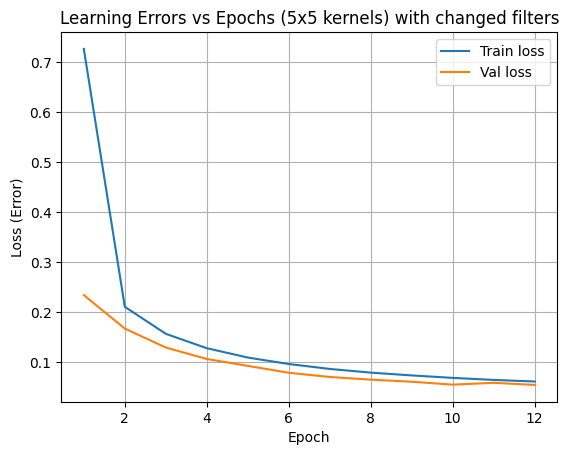

In [ ]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
import matplotlib.pyplot as plt

batch_size = 128
num_classes = 10
epochs = 12
# input image dimensions
img_rows, img_cols = 28, 28
# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
  x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
  x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
  input_shape = (1, img_rows, img_cols)
else:
  x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
  x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
  input_shape = (img_rows, img_cols, 1)

# Normalize pixel values to [0,1] for stable training
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')
# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
model = Sequential()
# Number of feature maps updated
model.add(Conv2D(12, kernel_size=(5,
5),activation='relu',input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(20, (5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(120, activation='relu'))
model.add(Dense(84, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))
# https://keras.io/optimizers/
model.compile(loss=keras.losses.categorical_crossentropy,
optimizer=keras.optimizers.Adadelta(learning_rate=0.1, rho=0.95), metrics=['accuracy'])

# store history
history=model.fit(x_train, y_train,
batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(x_test,
y_test))


# Evaluate the test data
score = model.evaluate(x_test, y_test, verbose=0)
test_err = 1.0 - score[1]
print('Test loss:', score[0])
print('Test accuracy:', score[1])
print('Test error:', test_err)

# Plot
epochs_range = range(1, epochs + 1)
plt.figure()
plt.plot(epochs_range, history.history['loss'], label='Train loss')
plt.plot(epochs_range, history.history['val_loss'], label='Val loss')
plt.xlabel('Epoch')
plt.ylabel('Loss (Error)')
plt.title('Learning Errors vs Epochs (5x5 kernels) with changed filters')
plt.legend()
plt.grid(True)
plt.show()